In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptron

Começamos com um problema de classificação. Supondo que tenhamos os seguintes dados:

|Idade (anos)|Peso (kg)|
|:----------:|:-------:|
|10          |60       |
|20          |40       |
|30          |40       |
|40          |100      |

E queiramos classificar os indivíduos das linhas 1, 2 e 3 como aceitos e o indivíduo da linha 4 como negado, poderíamos pensar simplesmente que
estariamos aceitando indivíduos cujo peso somado à idade seja menor ou igual que 70. Contudo, pode haver outras funções matemáticas que classifiquem esses dados da maneira como queremos. Vejamos o trabalho do perceptron.

In [96]:
x1 = np.asarray([1, 10, 60])
y1 = 1
x2 = np.asarray([1, 20, 40])
y2 = 1
x3 = np.asarray([1, 30, 40])
y3 = 1
x4 = np.asarray([1, 40, 100])
y4 = -1

w = [10, 2, 4]
data = [[x1, y1], [x2, y2], [x3, y3], [x4, y4]]


Primeiro, inicializamos cada indivíduo como um array de dados do tipo $$X = \begin{bmatrix}x_0 & x_1 & x_2 \end{bmatrix}$$
onde $$x_1 = \text{idade}; \,\,\,\,\, x_2 = \text{peso}; \,\,\,\,\, x_0 = 1 $$
Utilizamos $x_0 = 1$ para facilitar a notação do Perceptron, já que o valor de threshold ou bias, foi incorporado no valor nos pesos como $w_0$.

### Algoritmo de aprendizado do Perceptron
O algoritmo de aprendizado do perceptron (PLA) consiste em começar com valores aleatórios para o vetor de pesos $w$, que será do tipo 
$$w = \begin{bmatrix} w_0 & w_1 & w_2 \end{bmatrix}$$
E, enquanto houver dados mal classficados, ou seja, dados cujo pronto escalar entre os vetores $x$ e $w$ tenha sinal diferente do esperado, atualizamos o valor do vetor $w$ para $$w(t+1) = w(t) + y_nX_n$$ 

In [97]:
def PLA(data, w):
    quebrou = True
    cont = 0
    #print(f"w_{cont} = {w}")
    cont = 0
    while(quebrou):
        cont += 1
        for i in range(0,4):
            if(data[i][1] != np.sign(np.dot(w, data[i][0]))):
                cont += 1
                w = w + data[i][1]*data[i][0]
                #print(f"w_{cont} = {w}")
                quebrou = True
                break
            quebrou = False

    print(f"Levamos {cont} iterações para encontrar w")
    return w
        

Apesar do nosso exemplo ser um problema com 2 dimensões, talvez seja interessante trazer o Algoritmo de Aprendizado do Perceptron para o caso unidimensional, para podermos entender o motivo de tal passo de atualização do vetor $w$ funcionar.

In [98]:
x11 = np.asarray([1, 10])
y11 = 1
x12 = np.asarray([1, 15])
y12 = 1
x13 = np.asarray([1, 20])
y13 = 1
x14 = np.asarray([1, 25])
y14 = -1
x15 = np.asarray([1, 30])
y15 = -1
x16 = np.asarray([1, 35])
y16 = -1

w1 = [10, 2]
data1 = [[x11, y11], [x12, y12], [x13, y13], [x14, y14], [x15, y15], [x16, y16]]

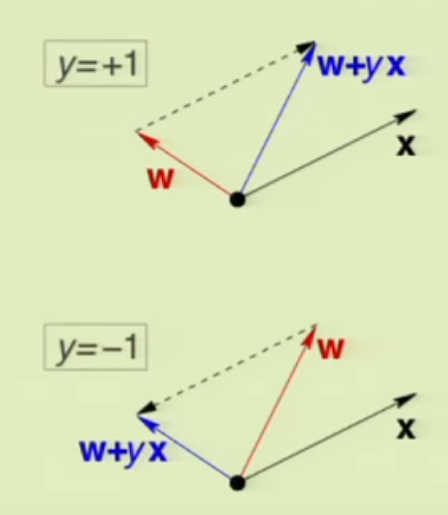

In [99]:
from IPython.display import Image
Image("img/wAtualiza.png")

In [100]:
print("w =", PLA(data1, w1))

Levamos 285 iterações para encontrar w
w = [62 -3]


Nesse caso, obtivemos um valor de $w$ com duas coordenadas, isso quer dizer que temos uma reta. Ou seja, $w$ nos dá a função: $y = -3x + 62$ 

Observe:

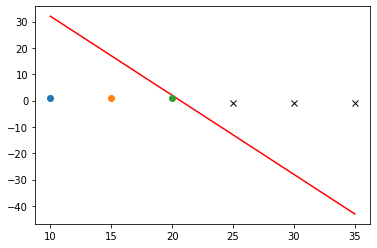

In [101]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(10, 35, 10)
plt.plot(x, -3*x + 62, '-r')
plt.plot(10, 1, "-o")
plt.plot(15, 1, "-o")
plt.plot(20, 1, "-o")
plt.plot(25, -1, "-x", color = "black")
plt.plot(30, -1, "-x", color = "black")
plt.plot(35, -1, "-x", color = "black")

plt.show()

### Dúvida:
* No processo de aprendizado do Perceptron, quando escolhemos um ponto que está classificado erroneamente, devemos rodar o PLA nesse ponto exclusivamente até que ele seja classficado corretamente? Ou podemos ir ajustando mais de um ponto de uma vez só?

Agora, vamos voltar ao caso bidimensional:

In [102]:
print("w =", PLA(data, w))

Levamos 20827 iterações para encontrar w
w = [3481 -148   24]


* Após obter o valor do vetor dos pesos ($w$), note que temos um plano que divide esses valores linearmente separaveis.

* Nesse sentido, podemos representar a interesecção desse plano com o plano $Oxy$ $(z = 0)$.

* Disso, temos:

$$w = \begin{bmatrix}
3481 & -148 & 24
\end{bmatrix}$$

$$\begin{cases}
z = 0 \\
z = 3481 - 148x + 24y
\end{cases} \Rightarrow 
\\[10pt]
\Rightarrow y = \dfrac{148}{24}x - \dfrac{3481}{24}$$



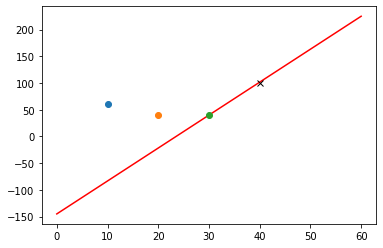

In [103]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
x = np.linspace(0, 60, 100)
plt.plot(x, (148/24)*x - (3481/24), '-r')
plt.plot(10, 60, "-o")
plt.plot(20, 40, "-o")
plt.plot(30, 40, "-o")
plt.plot(40, 100, "-x", color = "black")
plt.show()

# Computadores Analógicos no Contexto de IA

* Como mostrado no PLA, passo de atualização do vetor de pesos do Perceptron, ocorre um produto escalar entre vetores (dot product).


* Agora, se utilizarmos mais camadas de decisão do Perceptron, esse produto se tornará multiplicação de matrizes.


* Dessa forma, seja no Perceptron ou em outro algoritmo de ML, efetuamos em peso as operações soma e multiplicação.

Para esse propósito, então, nos dias atuais, pode ser mais interessante a utilização de chips analógicos para efetuar essas operações matemáticas.

Isso ocorre pois é muito menos custoso efetuar somas e multiplicações de maneira analógica do que digital. Por exemplo,
Para somar dois numéros, basta unir duas correntes elétricas:

$$I_3 = I_1 + I_3$$

Já para multiplicar, basta utilizar a Lei de Ohm:

$$V = R \times I $$

Já pelo lado do digital, precisamos de múltiplos transistores e de maior gasto de energia para efetuar essas operações. Apesar de haver desenvolvimento tecnológico no sentido da utilização de GPU's ou até mesmo de TPU's, tais métodos utilizam muita energia, não são compactos e são caros. Aí entra o desenvolvimento de chips analógicos em aplicações de ML.


### Exemplo: Mythic AI:

|                               | TOPS | Consumo de Energia |
|:-----------------------------:|:----:|:------------------:|
|M1076 Analog Matrix Processor  | 25   | 3W                 |
|Geforce RTX 3060               | 101  | 200W               |





